In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gzbuilder_analysis.rendering as rg
from sklearn.metrics import mean_squared_error

In [2]:
fm = pd.read_pickle('lib/fitting_metadata_.pkl')

In [3]:
sample_idx = np.random.choice(fm.index)

In [4]:
possible_transformations = (
    lambda a: a,
    lambda a: np.rot90(a),
    lambda a: np.rot90(np.rot90(a)),
    lambda a: np.rot90(np.rot90(np.rot90(a))),  
    lambda a: np.flipud(a),
    lambda a: np.rot90(np.flipud(a)),
    lambda a: np.rot90(np.rot90(np.flipud(a))),
    lambda a: np.rot90(np.rot90(np.rot90(np.flipud(a)))),
)

In [5]:
foo = fm.loc[sample_idx]

In [6]:
def compare_with_transform(transform, data, target, mask):
    transformed = (transform(data) * mask).ravel()
    return mean_squared_error(
        transformed[np.isfinite(transformed)],
        target.ravel()[np.isfinite(transformed)]
    )

In [7]:
transforms_used = pd.Series([], name='transform')
for i in fm.index.values:
    foo = fm.loc[i]
    mses = [
        compare_with_transform(
            transform, foo['galaxy_data'],
            foo['original_data'], foo['pixel_mask']
        )
        for transform in possible_transformations
    ]
#     d = possible_transformations[np.argmin(mses)](foo['galaxy_data']) * foo['pixel_mask']
    transforms_used.loc[i] = np.argmin(mses)

In [8]:
transforms_used.groupby(transforms_used).count()

transform
0     98
1     14
2     21
3    156
5      4
6      2
7      1
Name: transform, dtype: int64

In [ ]:
Cutout2d

In [26]:
idx

20902029

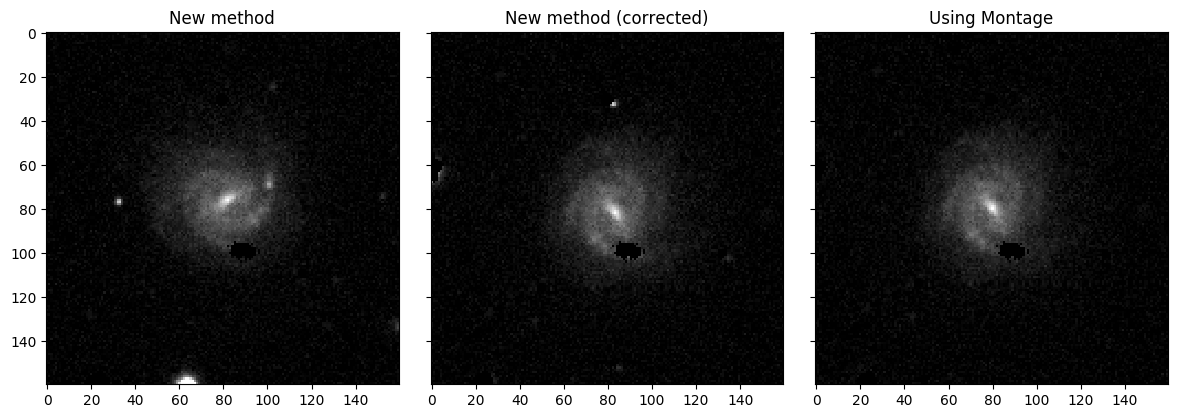

In [23]:
idx = fm[transforms_used == 3].sample().index[0]
f, ax = plt.subplots(figsize=(12, 4), sharey=True, ncols=3, dpi=100)
k = dict(cmap='gray', vmin=0, vmax=rg.asinh_stretch(1))
ax[0].set_title('New method')
ax[0].imshow(rg.asinh_stretch(fm.loc[idx]['galaxy_data'] * fm.loc[idx]['pixel_mask']), **k)
ax[1].set_title('New method (corrected)')
ax[1].imshow(rg.asinh_stretch(possible_transformations[transforms_used.loc[idx]](fm.loc[idx]['galaxy_data']) * fm.loc[idx]['pixel_mask']), **k)
ax[2].set_title('Using Montage')
ax[2].imshow(rg.asinh_stretch(fm.loc[idx]['original_data']), **k)
plt.tight_layout()